In [10]:
#Uploading file in google collab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"harirajbanchode","key":"c09e2418b38fc6f4388ff8a6a54dab43"}'}

In [11]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c dogs-vs-cats


 99% 804M/812M [00:04<00:00, 177MB/s]
100% 812M/812M [00:05<00:00, 170MB/s]


In [13]:
!unzip -qq dogs-vs-cats.zip



In [14]:
!unzip -qq train.zip



In [34]:
#Splitting train dataset into train, validation, and test sets and creating a new directory for each subset
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [35]:
#Creating data subset  for 'test,' 'validation,' and 'train' Sets
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)

FileExistsError: ignored

In [17]:
#creating a neural network using TensorFlow and Keras.
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
#CNN model for image classification
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [20]:
#Compiling model for binary classification
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [37]:
#Load Image Datasets from Directories
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [23]:
#Creating a TensorFlow Dataset from a NumPy array
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

In [ ]:
#Printing the shape of the first batch of training data
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

In [28]:
#Training the best model on validation loss
callbacks = keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss")

model1 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 209s 3s/step - loss: 0.6615 - accuracy: 0.6225 - val_loss: 0.6652 - val_accuracy: 0.6100
Epoch 2/30
63/63 [==============================] - 201s 3s/step - loss: 0.6342 - accuracy: 0.6545 - val_loss: 0.6800 - val_accuracy: 0.5990
Epoch 3/30
63/63 [==============================] - 235s 4s/step - loss: 0.6205 - accuracy: 0.6600 - val_loss: 0.6134 - val_accuracy: 0.6790
Epoch 4/30
63/63 [==============================] - 195s 3s/step - loss: 0.5770 - accuracy: 0.6990 - val_loss: 0.5962 - val_accuracy: 0.7040
Epoch 5/30
63/63 [==============================] - 195s 3s/step - loss: 0.5614 - accuracy: 0.7110 - val_loss: 0.6249 - val_accuracy: 0.6660
Epoch 6/30
63/63 [==============================] - 202s 3s/step - loss: 0.5303 - accuracy: 0.7420 - val_loss: 0.5605 - val_accuracy: 0.7250
Epoch 7/30
63/63 [==============================] - 195s 3s/step - loss: 0.4822 - accuracy: 0.7670 - val_loss: 0.6123 - val_accuracy: 0.7080
Epoch 8/30
63

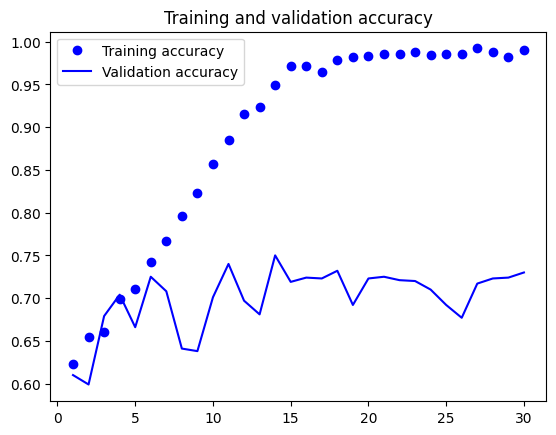

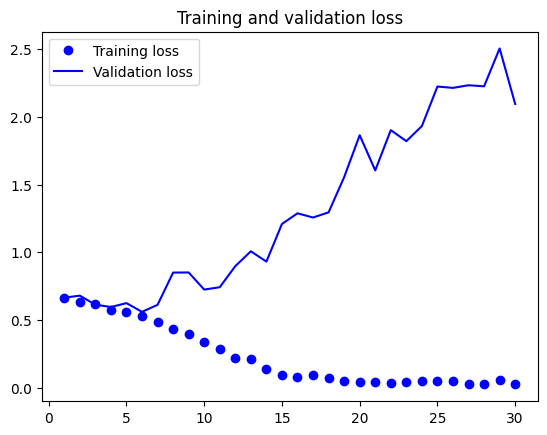

In [31]:
#Visualization of Training and Validation Metrics
import matplotlib.pyplot as plt
accuracy = model1.history["accuracy"]
val_accuracy = model1.history["val_accuracy"]
loss = model1.history["loss"]
val_loss = model1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [33]:
#Testing a CNN Model
test_model = keras.models.load_model("convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 23s 682ms/step - loss: 0.5369 - accuracy: 0.7260
Test accuracy: 0.726


In [35]:
#Data Augmentation with Keras for Image Processing
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [36]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [83]:
callbacks = keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.x",
        save_best_only=True,
        monitor="val_loss")

model2 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 46s 140ms/step - loss: 0.1128 - accuracy: 0.9637 - val_loss: 0.0964 - val_accuracy: 0.9730
Epoch 2/30
313/313 [==============================] - 41s 130ms/step - loss: 0.0962 - accuracy: 0.9691 - val_loss: 0.0846 - val_accuracy: 0.9780
Epoch 3/30
313/313 [==============================] - 41s 129ms/step - loss: 0.0889 - accuracy: 0.9714 - val_loss: 0.1054 - val_accuracy: 0.9770
Epoch 4/30
313/313 [==============================] - 39s 125ms/step - loss: 0.0816 - accuracy: 0.9733 - val_loss: 0.0930 - val_accuracy: 0.9780
Epoch 5/30
313/313 [==============================] - 42s 132ms/step - loss: 0.0727 - accuracy: 0.9767 - val_loss: 0.1346 - val_accuracy: 0.9760
Epoch 6/30
313/313 [==============================] - 42s 133ms/step - loss: 0.0687 - accuracy: 0.9777 - val_loss: 0.1293 - val_accuracy: 0.9790
Epoch 7/30
313/313 [==============================] - 40s 128ms/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.1108 - val_ac

In [84]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 91ms/step - loss: 0.0897 - accuracy: 0.9800
Test accuracy: 0.980


In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

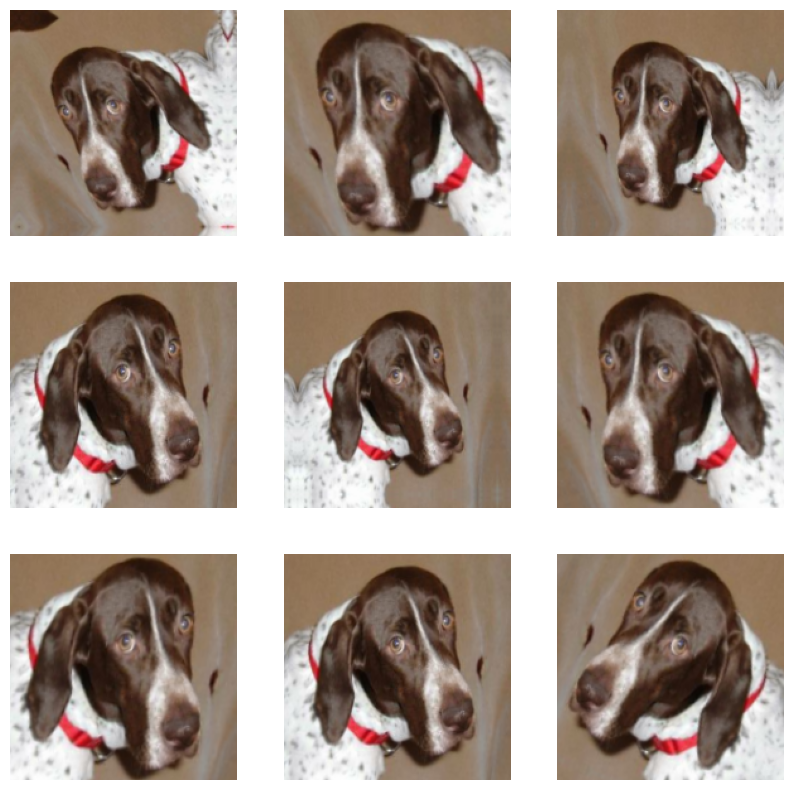

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [50]:
#CNN for Image Classification using dropout method
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [85]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.x",
        save_best_only=True,
        monitor="val_loss")
]
model3 = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
313/313 [==============================] - 42s 132ms/step - loss: 0.0252 - accuracy: 0.9944 - val_loss: 0.3082 - val_accuracy: 0.9770
Epoch 2/15
313/313 [==============================] - 39s 125ms/step - loss: 0.0269 - accuracy: 0.9939 - val_loss: 0.3119 - val_accuracy: 0.9710
Epoch 3/15
313/313 [==============================] - 45s 143ms/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 0.2525 - val_accuracy: 0.9730
Epoch 4/15
313/313 [==============================] - 39s 124ms/step - loss: 0.0238 - accuracy: 0.9936 - val_loss: 0.3129 - val_accuracy: 0.9760
Epoch 5/15
313/313 [==============================] - 40s 127ms/step - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.2738 - val_accuracy: 0.9770
Epoch 6/15
313/313 [==============================] - 40s 128ms/step - loss: 0.0243 - accuracy: 0.9934 - val_loss: 0.3728 - val_accuracy: 0.9760
Epoch 7/15
313/313 [==============================] - 41s 129ms/step - loss: 0.0226 - accuracy: 0.9952 - val_loss: 0.6232 - val_ac

In [86]:
#Testing the CNN with dropout
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 90ms/step - loss: 0.1413 - accuracy: 0.9840
Test accuracy: 0.984


In [56]:
#Image data augmentation with keras sequential model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [57]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [87]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.x",
        save_best_only=True,
        monitor="val_loss")
]
model4 = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 42s 132ms/step - loss: 0.0237 - accuracy: 0.9946 - val_loss: 0.3048 - val_accuracy: 0.9770
Epoch 2/10
313/313 [==============================] - 39s 123ms/step - loss: 0.0235 - accuracy: 0.9955 - val_loss: 0.3255 - val_accuracy: 0.9780
Epoch 3/10
313/313 [==============================] - 39s 124ms/step - loss: 0.0251 - accuracy: 0.9951 - val_loss: 0.3629 - val_accuracy: 0.9780
Epoch 4/10
313/313 [==============================] - 40s 126ms/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.3864 - val_accuracy: 0.9780
Epoch 5/10
313/313 [==============================] - 40s 127ms/step - loss: 0.0250 - accuracy: 0.9950 - val_loss: 0.3654 - val_accuracy: 0.9740
Epoch 6/10
313/313 [==============================] - 41s 129ms/step - loss: 0.0207 - accuracy: 0.9963 - val_loss: 0.4008 - val_accuracy: 0.9780
Epoch 7/10
313/313 [==============================] - 44s 140ms/step - loss: 0.0225 - accuracy: 0.9956 - val_loss: 0.2728 - val_ac

In [88]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.x")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 90ms/step - loss: 0.2249 - accuracy: 0.9840
Test accuracy: 0.984


In [24]:
#Increasing the Training sample size to 5000.
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [28]:
#Model configuration for binary image classification
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more.
early_stopping_monitor = EarlyStopping(patience=10)

In [30]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


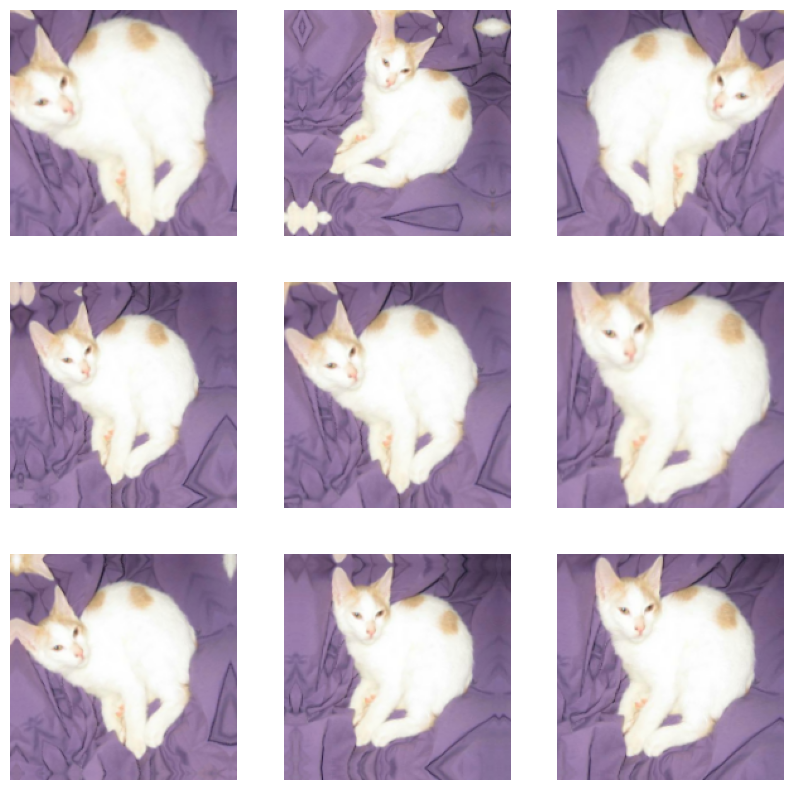

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [40]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
model5 = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 18s 55ms/step - loss: 0.5990 - accuracy: 0.6819 - val_loss: 0.6748 - val_accuracy: 0.6250
Epoch 2/30
313/313 [==============================] - 17s 54ms/step - loss: 0.5120 - accuracy: 0.7513 - val_loss: 0.5618 - val_accuracy: 0.7290
Epoch 3/30
313/313 [==============================] - 17s 54ms/step - loss: 0.4429 - accuracy: 0.7987 - val_loss: 0.4195 - val_accuracy: 0.7890
Epoch 4/30
313/313 [==============================] - 18s 58ms/step - loss: 0.3904 - accuracy: 0.8264 - val_loss: 0.3698 - val_accuracy: 0.8430
Epoch 5/30
313/313 [==============================] - 19s 60ms/step - loss: 0.3427 - accuracy: 0.8517 - val_loss: 0.3452 - val_accuracy: 0.8470
Epoch 6/30
313/313 [==============================] - 20s 63ms/step - loss: 0.3005 - accuracy: 0.8749 - val_loss: 0.3620 - val_accuracy: 0.8370
Epoch 7/30
313/313 [==============================] - 16s 51ms/step - loss: 0.2571 - accuracy: 0.8937 - val_loss: 0.3540 - val_accuracy:

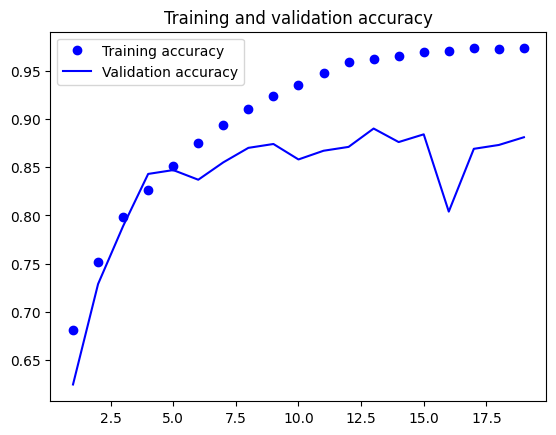

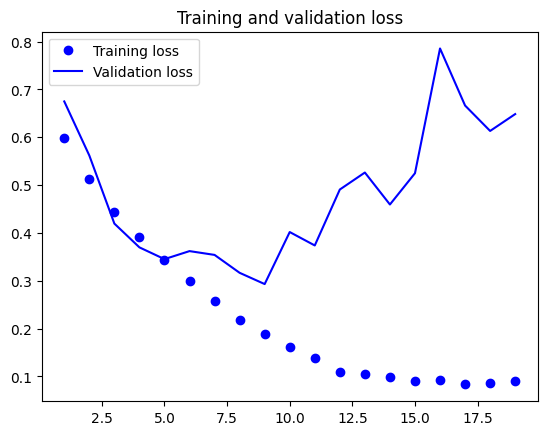

In [44]:
accuracy = model5.history["accuracy"]
val_accuracy = model5.history["val_accuracy"]
loss = model5.history["loss"]
val_loss = model5.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [42]:
test_model = keras.models.load_model("convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.3285 - accuracy: 0.8640
Test accuracy: 0.864


In [45]:
#Model 3: Increasing the Training sample size to 10000
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)


Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [46]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


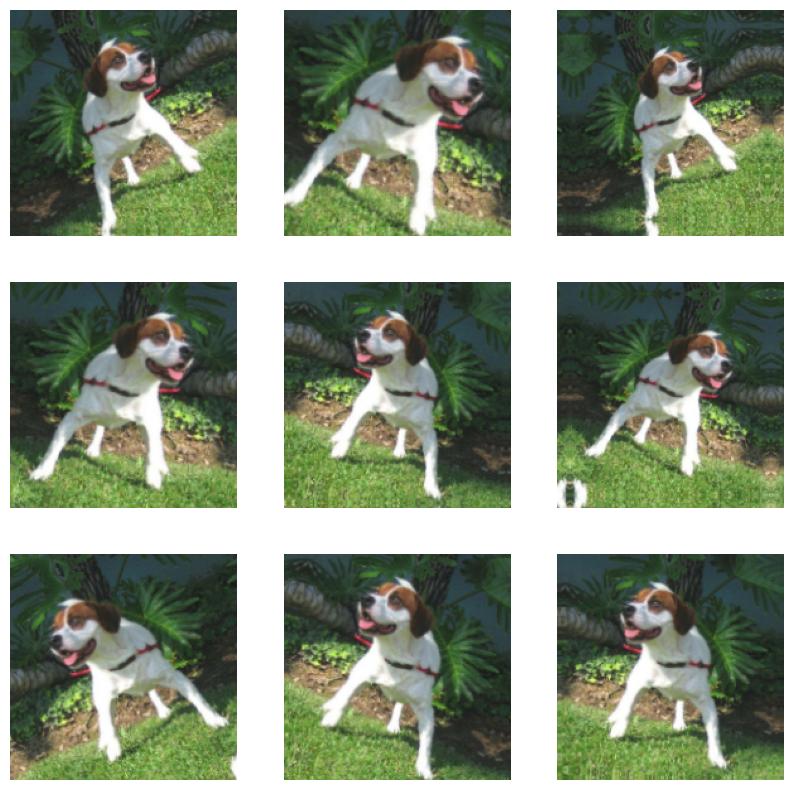

In [48]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [50]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
model6 = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 37s 57ms/step - loss: 0.5157 - accuracy: 0.7473 - val_loss: 0.4501 - val_accuracy: 0.7970
Epoch 2/30
625/625 [==============================] - 34s 54ms/step - loss: 0.4220 - accuracy: 0.8047 - val_loss: 0.3836 - val_accuracy: 0.8310
Epoch 3/30
625/625 [==============================] - 32s 50ms/step - loss: 0.3465 - accuracy: 0.8511 - val_loss: 0.3707 - val_accuracy: 0.8400
Epoch 4/30
625/625 [==============================] - 36s 57ms/step - loss: 0.2910 - accuracy: 0.8767 - val_loss: 0.2736 - val_accuracy: 0.8810
Epoch 5/30
625/625 [==============================] - 32s 51ms/step - loss: 0.2420 - accuracy: 0.8995 - val_loss: 0.2933 - val_accuracy: 0.8720
Epoch 6/30
625/625 [==============================] - 32s 51ms/step - loss: 0.2092 - accuracy: 0.9154 - val_loss: 0.2277 - val_accuracy: 0.9020
Epoch 7/30
625/625 [==============================] - 33s 52ms/step - loss: 0.1800 - accuracy: 0.9280 - val_loss: 0.2745 - val_accuracy:

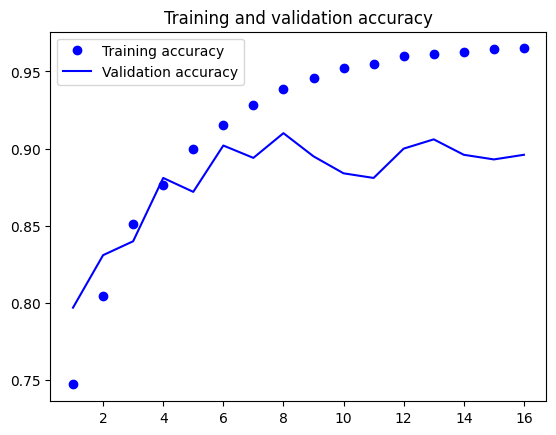

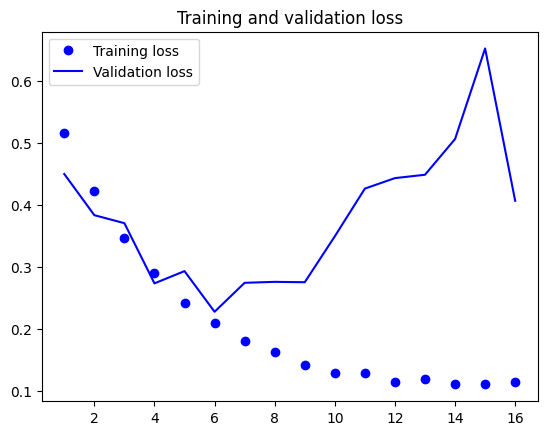

In [52]:
accuracy = model6.history["accuracy"]
val_accuracy = model6.history["val_accuracy"]
loss = model6.history["loss"]
val_loss = model6.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [53]:

test_model = keras.models.load_model("convnet_from_scratch.x")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 30ms/step - loss: 0.2950 - accuracy: 0.8820
Test accuracy: 0.882


In [54]:
#VGG16 Pre-trained Model Initialization
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [55]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [56]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [57]:

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [58]:
#Data Augmentation Configuration
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [59]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [62]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.x",
        save_best_only=True,
        monitor="val_loss")
]
model7 = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 43s 136ms/step - loss: 0.2299 - accuracy: 0.9321 - val_loss: 0.1387 - val_accuracy: 0.9730
Epoch 2/30
313/313 [==============================] - 42s 132ms/step - loss: 0.1573 - accuracy: 0.9508 - val_loss: 0.1326 - val_accuracy: 0.9770
Epoch 3/30
313/313 [==============================] - 41s 130ms/step - loss: 0.1196 - accuracy: 0.9610 - val_loss: 0.0911 - val_accuracy: 0.9750
Epoch 4/30
313/313 [==============================] - 39s 124ms/step - loss: 0.1021 - accuracy: 0.9625 - val_loss: 0.1116 - val_accuracy: 0.9740
Epoch 5/30
313/313 [==============================] - 41s 131ms/step - loss: 0.1021 - accuracy: 0.9679 - val_loss: 0.1032 - val_accuracy: 0.9780
Epoch 6/30
313/313 [==============================] - 40s 127ms/step - loss: 0.0859 - accuracy: 0.9729 - val_loss: 0.1039 - val_accuracy: 0.9760
Epoch 7/30
313/313 [==============================] - 40s 127ms/step - loss: 0.0789 - accuracy: 0.9724 - val_loss: 0.1484 - val_ac

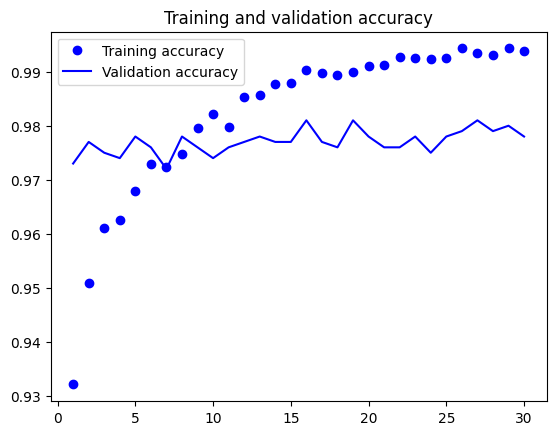

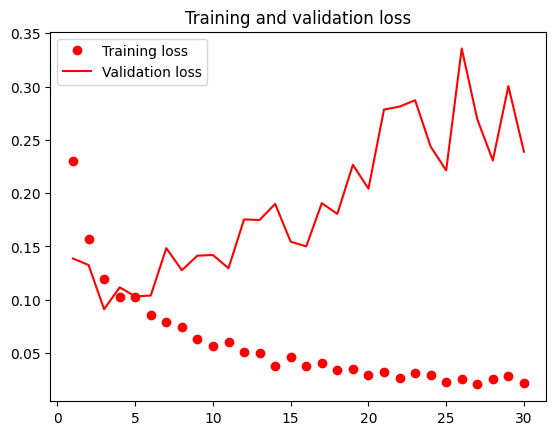

In [64]:
import matplotlib.pyplot as plt
accuracy = model7.history["accuracy"]
val_accuracy = model7.history["val_accuracy"]
loss = model7.history["loss"]
val_loss = model7.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [66]:
model = keras.models.load_model("fine_tuning.x")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 89ms/step - loss: 0.1232 - accuracy: 0.9760
Test accuracy: 0.976


In [67]:
#Pre-Trained Model - 5000 Training samples
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


In [68]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [69]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [70]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [71]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.x",
        save_best_only=True,
        monitor="val_loss")
]
model8 = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 43s 128ms/step - loss: 1.3225 - accuracy: 0.8622 - val_loss: 0.1292 - val_accuracy: 0.9670
Epoch 2/10
313/313 [==============================] - 39s 125ms/step - loss: 0.1970 - accuracy: 0.9376 - val_loss: 0.1565 - val_accuracy: 0.9600
Epoch 3/10
313/313 [==============================] - 41s 132ms/step - loss: 0.1553 - accuracy: 0.9475 - val_loss: 0.1138 - val_accuracy: 0.9690
Epoch 4/10
313/313 [==============================] - 41s 131ms/step - loss: 0.1190 - accuracy: 0.9590 - val_loss: 0.1193 - val_accuracy: 0.9720
Epoch 5/10
313/313 [==============================] - 41s 130ms/step - loss: 0.1026 - accuracy: 0.9654 - val_loss: 0.1112 - val_accuracy: 0.9740
Epoch 6/10
313/313 [==============================] - 43s 137ms/step - loss: 0.0943 - accuracy: 0.9700 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 7/10
313/313 [==============================] - 38s 122ms/step - loss: 0.0806 - accuracy: 0.9715 - val_loss: 0.1098 - val_ac

In [73]:
model = keras.models.load_model("fine_tuning2.x")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 90ms/step - loss: 0.0960 - accuracy: 0.9770
Test accuracy: 0.977


In [74]:
#Pre-Trained Model - 10000 samples
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


In [76]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [77]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


In [78]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [79]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.x",
        save_best_only=True,
        monitor="val_loss")
]
model9 = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 81s 122ms/step - loss: 0.6798 - accuracy: 0.9020 - val_loss: 0.1743 - val_accuracy: 0.9740
Epoch 2/10
625/625 [==============================] - 79s 126ms/step - loss: 0.1410 - accuracy: 0.9508 - val_loss: 0.1302 - val_accuracy: 0.9710
Epoch 3/10
625/625 [==============================] - 79s 126ms/step - loss: 0.1116 - accuracy: 0.9614 - val_loss: 0.1567 - val_accuracy: 0.9770
Epoch 4/10
625/625 [==============================] - 78s 123ms/step - loss: 0.0989 - accuracy: 0.9668 - val_loss: 0.1706 - val_accuracy: 0.9770
Epoch 5/10
625/625 [==============================] - 78s 125ms/step - loss: 0.0875 - accuracy: 0.9720 - val_loss: 0.1538 - val_accuracy: 0.9810
Epoch 6/10
625/625 [==============================] - 80s 127ms/step - loss: 0.0835 - accuracy: 0.9724 - val_loss: 0.1618 - val_accuracy: 0.9830
Epoch 7/10
625/625 [==============================] - 78s 125ms/step - loss: 0.0780 - accuracy: 0.9768 - val_loss: 0.1680 - val_ac

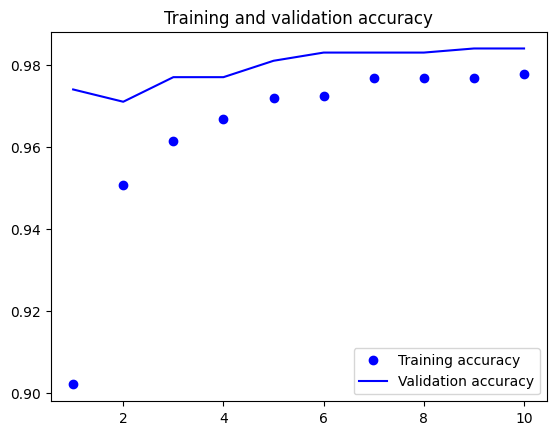

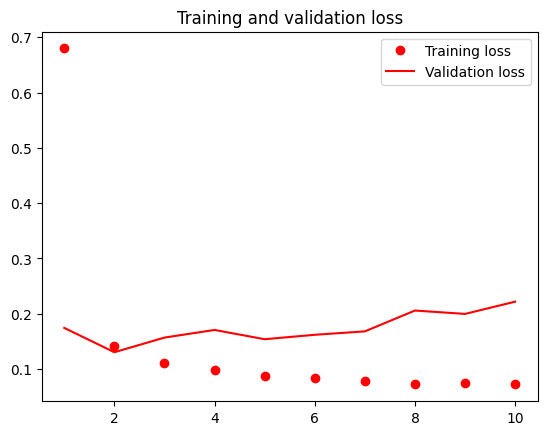

In [81]:
import matplotlib.pyplot as plt
accuracy = model9.history["accuracy"]
val_accuracy = model9.history["val_accuracy"]
loss = model9.history["loss"]
val_loss = model9.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [82]:
model = keras.models.load_model("fine_tuning3.x")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 89ms/step - loss: 0.0767 - accuracy: 0.9810
Test accuracy: 0.981
